In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model

### Creating The dataset

In [12]:
x = np.random.uniform(-20, 20, 10000)
y = 5 * x**3 - 10 * x**2 - 20 * x + 10

x_data = (2 * (x - np.min(x)) / (np.max(x) - np.min(x))) - 1
y_data = (2 * (y - np.min(y)) / (np.max(y) - np.min(y))) - 1

### Spliting the Dataset into Training & Testing


In [13]:
size = len(x_data)
x_train, y_train = x_data[: int(size * 0.9)] , y_data[: int(size * 0.9)]
x_validation, y_validation = x_data[int(size * 0.9) : int(size * 0.95)] , y_data[int(size * 0.9) : int(size * 0.95)]
x_test , y_test = x_data[int(size * 0.95) :] , y_data[int(size * 0.95) :]

### Building the Model


In [14]:
inputs = Input((1,))
x = Dense(32, activation = "relu")(inputs)
x = Dense(64, activation = "relu")(x)
x = Dense(128, activation = "relu")(x)
outputs = Dense(1, name = "Output_Layer")(x)

model = Model(inputs, outputs, name = "Deep_Neural_Network")
model.summary()

Model: "Deep_Neural_Network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

### Training the Model

In [15]:
model.compile(optimizer = "adam", loss = "mean_squared_error",  metrics = [tf.keras.metrics.R2Score(name = "accuracy")])
trained_model = model.fit(x_train, y_train, epochs = 50, batch_size = 32,  validation_data = (x_validation, y_validation), verbose = 1)
history = trained_model.history

Epoch 1/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7910 - loss: 0.0304 - val_accuracy: 0.9990 - val_loss: 1.1481e-04
Epoch 2/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9991 - loss: 1.2560e-04 - val_accuracy: 0.9998 - val_loss: 1.8551e-05
Epoch 3/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9998 - loss: 3.1738e-05 - val_accuracy: 1.0000 - val_loss: 5.5248e-06
Epoch 4/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9999 - loss: 1.2238e-05 - val_accuracy: 0.9998 - val_loss: 1.9960e-05
Epoch 5/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9999 - loss: 1.2775e-05 - val_accuracy: 0.9997 - val_loss: 3.9786e-05
Epoch 6/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9998 - loss: 3.2469e-05 - val_accuracy: 0.9999 - val_loss: 1.2805e-05
Epoch 7/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9999 - loss: 1.3120e-05 - val_accuracy: 1.0000 - val_loss: 3.3001e-06
Epoch 8/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/

### Plotting the Training & Validation Accuracy

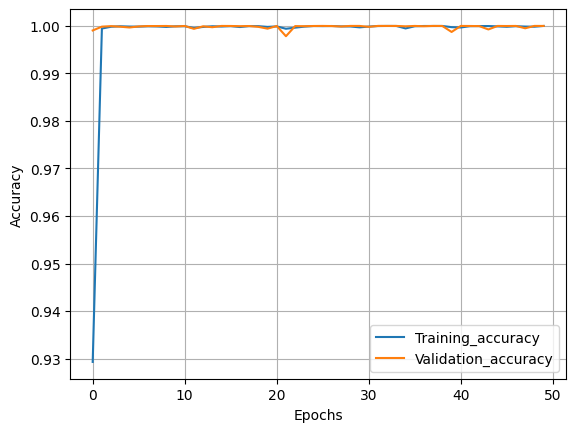

In [16]:
plt.plot(history["accuracy"])
plt.plot(history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_accuracy", "Validation_accuracy"])
plt.grid()
plt.show()

### Plotting the Training & Validation Loss

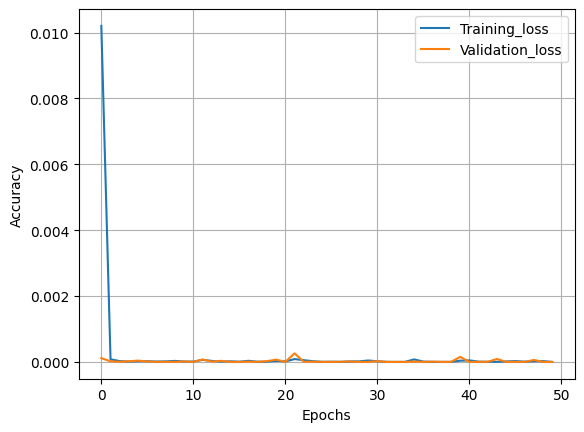

In [17]:
plt.plot(history["loss"])
plt.plot(history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_loss", "Validation_loss"])
plt.grid()
plt.show()

### Evoluate the Model

In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.5f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 8.7576e-07
Test Loss: 0.0000008
Test Accuracy: 99.99938%
